Question 1

In [1]:
import pandas as pd

# Load the dataset
path = "/Users/ahmed/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(path)

# Explore the dataset
print(data.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop customerID column and handle missing values if any
data = data.drop('customerID', axis=1)
data = data.dropna()

# Encode categorical variables
label_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                  'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                  'PaymentMethod']

label_encoder = LabelEncoder()
for col in label_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Convert TotalCharges to numeric (there might be some spaces causing it to be treated as a string)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Split the data into features (X) and target variable (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the decision tree model
print("Decision Tree Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Model:
Accuracy: 0.794180269694819
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.87      0.86      1036
         Yes       0.62      0.57      0.59       373

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [4]:
# Visualize feature importances
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print("Feature Importances:\n", importances)


Feature Importances:
 Contract            0.065555
OnlineSecurity      0.018010
gender              0.011142
PhoneService        0.003284
MultipleLines       0.003205
SeniorCitizen            NaN
Partner                  NaN
Dependents               NaN
tenure                   NaN
InternetService          NaN
OnlineBackup             NaN
DeviceProtection         NaN
TechSupport              NaN
StreamingTV              NaN
StreamingMovies          NaN
PaperlessBilling         NaN
PaymentMethod            NaN
MonthlyCharges           NaN
TotalCharges             NaN
dtype: float64


In [6]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the random forest model
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the test set using random forest
y_pred_rf = rf_model.predict(X_test_imputed)

# Evaluate the random forest model
print("\nRandom Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Model:
Accuracy: 0.7984386089425124
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.92      0.87      1036
         Yes       0.67      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



Question 2

In [9]:
# Load the dataset
url = "/Users/ahmed/Desktop/kc_house_data.csv"
data = pd.read_csv(url)
data = data.drop('date', axis=1)


# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [10]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Display correlation with the target variable (price)
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("Correlation with Price:\n", price_correlation)


Correlation with Price:
 price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


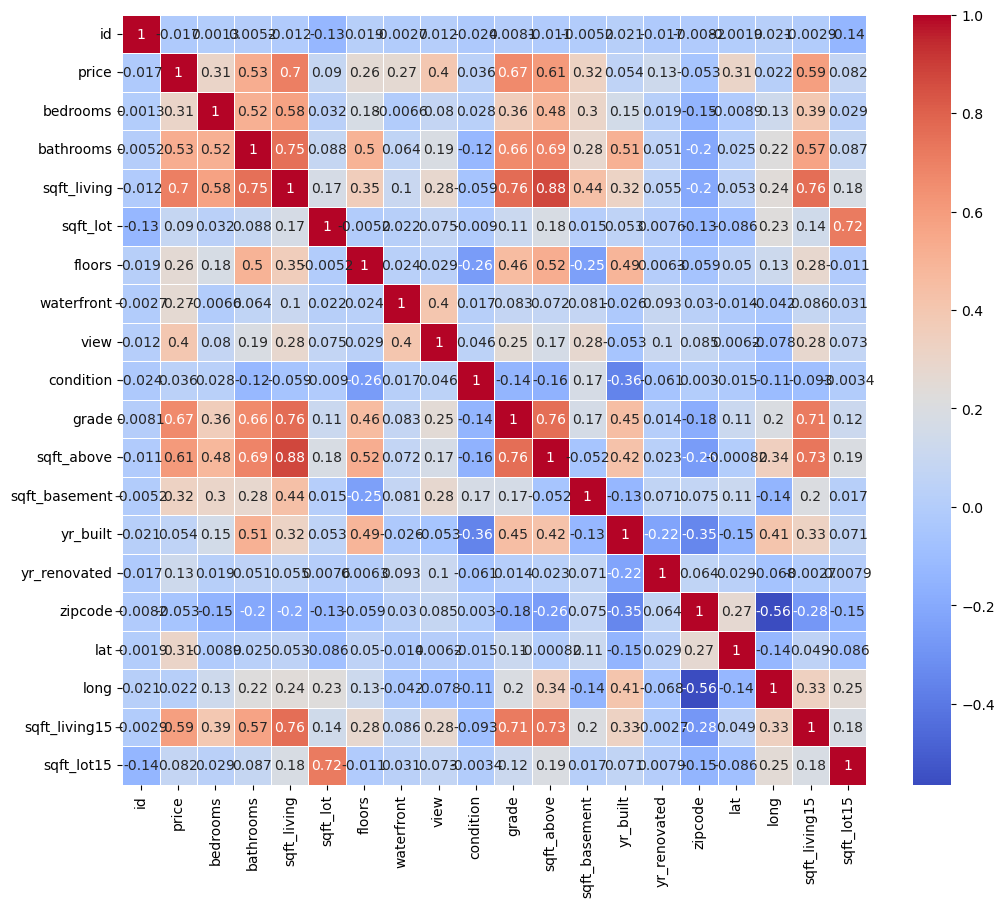

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix for all features
all_features_correlation = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(all_features_correlation, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data.drop('price', axis=1)
y = data['price']

# Normalize input data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Split data using KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_normalized):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    print("Linear Regression MSE:", mse_lr)

    # Train and evaluate Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    print("Ridge Regression MSE:", mse_ridge)

    # Train and evaluate Lasso Regression
    lasso_model = Lasso(alpha=1.0)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    print("Lasso Regression MSE:", mse_lasso)


Linear Regression MSE: 45376202943.26631
Ridge Regression MSE: 45369724077.27391


/Users/ahmed/miniforge3/envs/mltc_uglow/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.580e+13, tolerance: 1.832e+11
  model = cd_fast.enet_coordinate_descent(


Lasso Regression MSE: 45369293070.97892
Linear Regression MSE: 39974229874.47275
Ridge Regression MSE: 39985990185.47578


/Users/ahmed/miniforge3/envs/mltc_uglow/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.898e+13, tolerance: 1.969e+11
  model = cd_fast.enet_coordinate_descent(


Lasso Regression MSE: 39986222392.44026
Linear Regression MSE: 36658437098.373405
Ridge Regression MSE: 36655338543.70407
Lasso Regression MSE: 36655619054.13051


/Users/ahmed/miniforge3/envs/mltc_uglow/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.933e+13, tolerance: 2.025e+11
  model = cd_fast.enet_coordinate_descent(


In [15]:
from sklearn.decomposition import PCA

# Use PCA to remove correlation
pca = PCA()
X_pca = pca.fit_transform(X_normalized)


In [17]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Split data using KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_pca):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    print("Linear Regression MSE:", mse_lr)

    # Train and evaluate Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    print("Ridge Regression MSE:", mse_ridge)

    # Train and evaluate Lasso Regression
    lasso_model = Lasso(alpha=1.0)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    print("Lasso Regression MSE:", mse_lasso)


Linear Regression MSE: 45363986417.985115
Ridge Regression MSE: 45369724077.27391
Lasso Regression MSE: 45369338419.05511
Linear Regression MSE: 39986309054.77379
Ridge Regression MSE: 39985990185.47578
Lasso Regression MSE: 39986226636.53728
Linear Regression MSE: 36658089358.69533
Ridge Regression MSE: 36655338543.70408
Lasso Regression MSE: 36655547037.48158


In [18]:
# Use PCA to reduce the number of features
pca = PCA(n_components=5)
X_pca_reduced = pca.fit_transform(X_normalized)


In [19]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Split data using KFold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_pca_reduced):
    X_train, X_test = X_pca_reduced[train_index], X_pca_reduced[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    print("Linear Regression MSE:", mse_lr)

    # Train and evaluate Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    print("Ridge Regression MSE:", mse_ridge)

    # Train and evaluate Lasso Regression
    lasso_model = Lasso(alpha=1.0)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    print("Lasso Regression MSE:", mse_lasso)


Linear Regression MSE: 60485483712.80495
Ridge Regression MSE: 60485615010.94143
Lasso Regression MSE: 60485491778.17633
Linear Regression MSE: 52334729939.54194
Ridge Regression MSE: 52334703106.339264
Lasso Regression MSE: 52334732064.27895
Linear Regression MSE: 48901389901.34513
Ridge Regression MSE: 48901297927.931274
Lasso Regression MSE: 48901380109.92508
